# TMDB Box Office Prediction
# CS725: Course Project
Authors: <br>
*   A V Sai Pavan(213070007)
*   Binaya Kumar Sahoo(213070009)
*   Shashwat Pathak(213070010)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **README**
*  For running the below code cell, change the directory to the folder that 
contains the test and train csv files
*  Update the paths for test.csv and train.csv in the subsequent code blocks(EDA, Feature engineering, ML models)
*  For test score, the files created in test blocks of each model is uploaded to kaggle competition: https://www.kaggle.com/c/tmdb-box-office-prediction/submissions and the scores were noted.

In [108]:
%cd "/content/drive/MyDrive/Academics/Semester 1/Foundations of Machine Learning/Project"

/content/drive/MyDrive/Academics/Semester 1/Foundations of Machine Learning/Project


In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow.keras.backend as kb
import tensorflow as tf

In [4]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

# Scraping images
The below code blocks in this section were to scrape movie posters from TMDB website for using as extra features for the networks. Due to permission issues from TMDB website on web queries and there responses we were not able to implement the same. We are trying to get permission for TMDB API to do the same.

In [ ]:
# !unzip '/content/drive/MyDrive/Academics/Semester 1/Foundations of Machine Learning/Project/chromedriver_linux64.zip'

In [ ]:
# !pip install selenium
# !apt-get update # to update ubuntu to correctly run apt install
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

# import sys
# sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
# from selenium import webdriver
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
# wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
# wd.get("https://www.webite-url.com")

In [ ]:
# results = wd.get("https://www.themoviedb.org/")

In [ ]:
# print(results)

In [ ]:
# driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [ ]:
# search_url = "https://www.themoviedb.org"
# results = driver.get(search_url)

In [ ]:
# search_url= "https://nhai.gov.in/#/tenders"
# results = driver.get(search_url)

In [ ]:
# tab = driver.find_element_by_id('main')

In [ ]:
# driver = driver.find_element_by_id("mat-option-5")

In [ ]:
# from selenium.webdriver.support import expected_conditions
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait

# **EDA**
Reference for EDA code: https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat

**Data Description**
**id** - Integer unique id of each movie

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL  of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

**budget**:Budget of a movie in dollars. 0 values mean unknown. 

**genres** : Contains all the Genres Name & TMDB Id in JSON Format

**homepage** - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/	, this is the homepage of Whiplash movie.

**imdb_id** - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/<imdb_id_here>

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french. 

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English. 

**overview** - Brief description of the movie.

**popularity** -  Popularity of the movie in float. 

**poster_path** - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>

**production_companies** - All production company name and TMDB id in JSON format of a movie.

**production_countries** - Two digit code and full name of the production company in JSON format.

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes (Integer).

**spoken_languages** - Two digit code and full name of the spoken language. 

**status** - Is the movie released or rumored? 

**tagline** - Tagline of a movie 

**title** - English title of a movie

**Keywords** - TMDB Id and name of all the keywords in JSON format. 

**cast** - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc. 

**revenue** - Total revenue earned by a movie in dollars. 

In [6]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [8]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1815862,en,Black Sheep,An exploration of the United States of America...,NaN,/4WZPn7zUf8rNSPSbDMvNGK3ebCy.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Black Sheep,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe4e08c3a36847f827a303', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [9]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,4397,4140,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,4397,3366,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt0268126,en,Night of the Living Dead,No overview found.,NaN,/8oeFZFiD7qFkfBXXAJZTMQzdayQ.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What could go wrong?,The Girl with the Dragon Tattoo,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '52fe436cc3a36847f8053125', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,1,72,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,NaN,NaN,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,NaN,NaN,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count of missing values in each column in train:

In [10]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Count of missing values in each column in train:

In [11]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

Plot Budget vs Revenue.

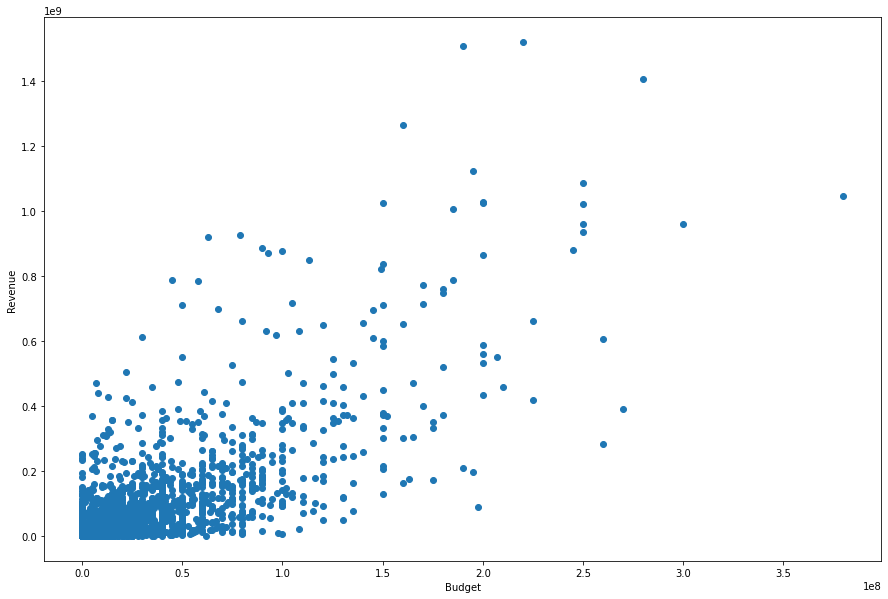

In [13]:

plt.figure(figsize=(15,10))
plt.scatter(train['budget'],train['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

Plot popularity vs revenue

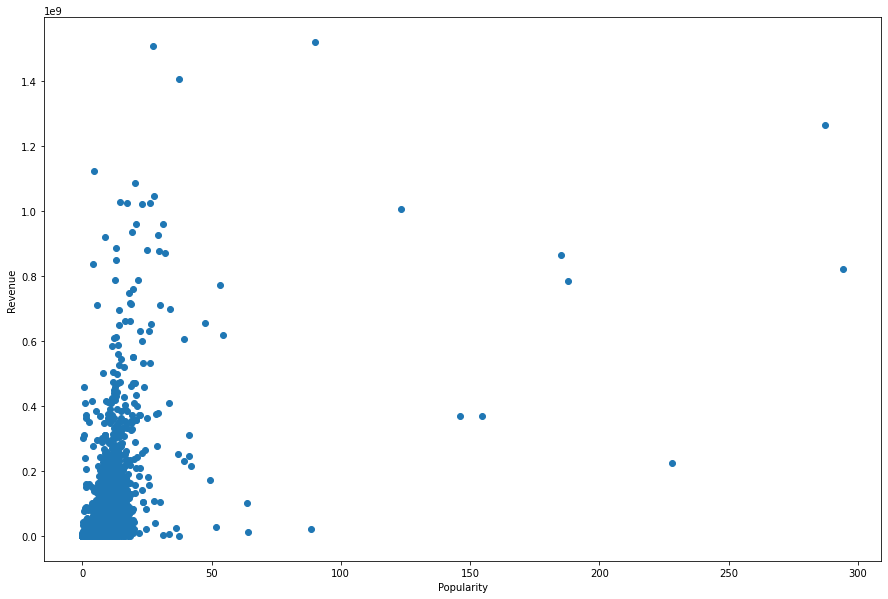

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(train['popularity'],train['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

Plot runtime vs revenue

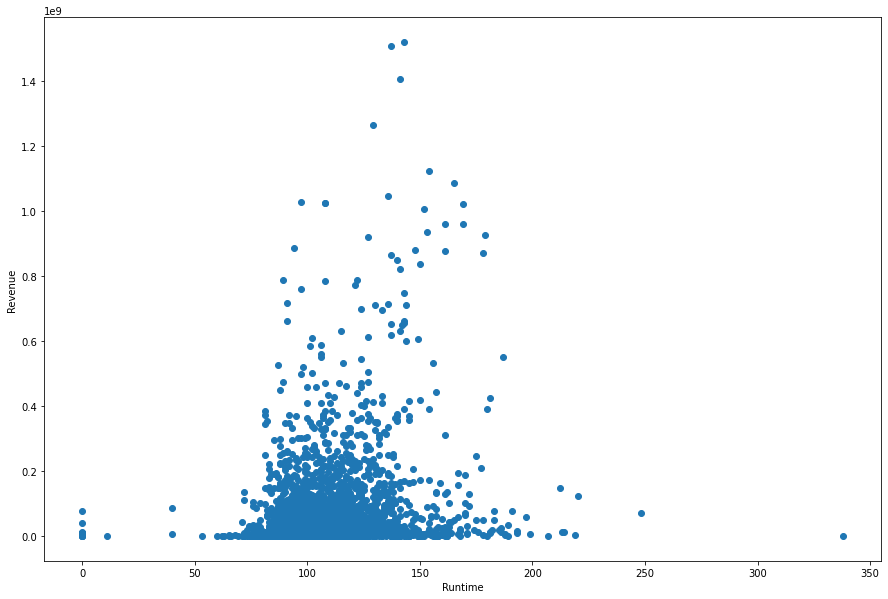

In [15]:

plt.figure(figsize=(15,10))
plt.scatter(train['runtime'],train['revenue'])
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.show()
plt.show()

Get Month, Day Year, Week day, quarter from release date

In [17]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

Plot Release Year vs Revenue. 

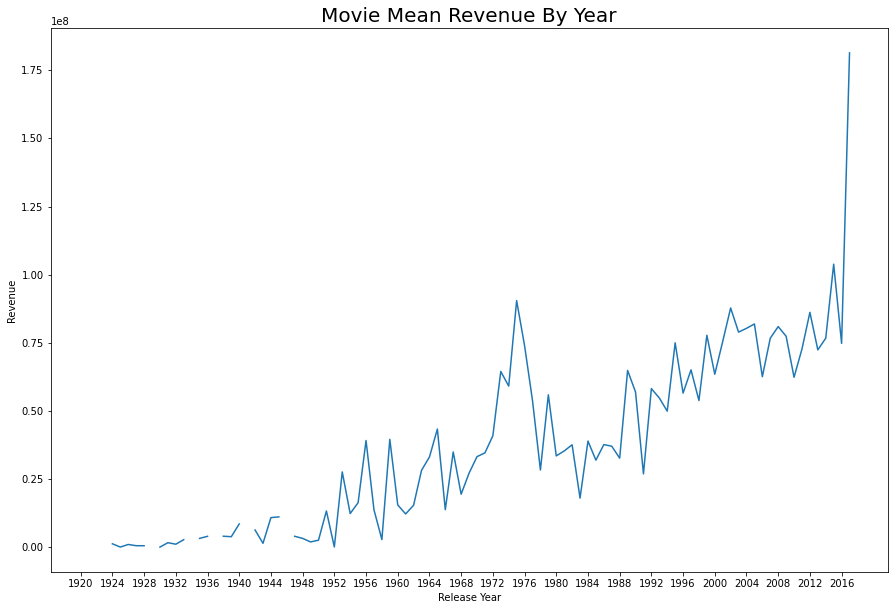

In [18]:
train['meanRevenueByYear'] = train.groupby("release_year")["revenue"].aggregate('mean')
train['meanRevenueByYear'].plot(figsize=(15,10))
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

Release Month Vs Revenue Plot

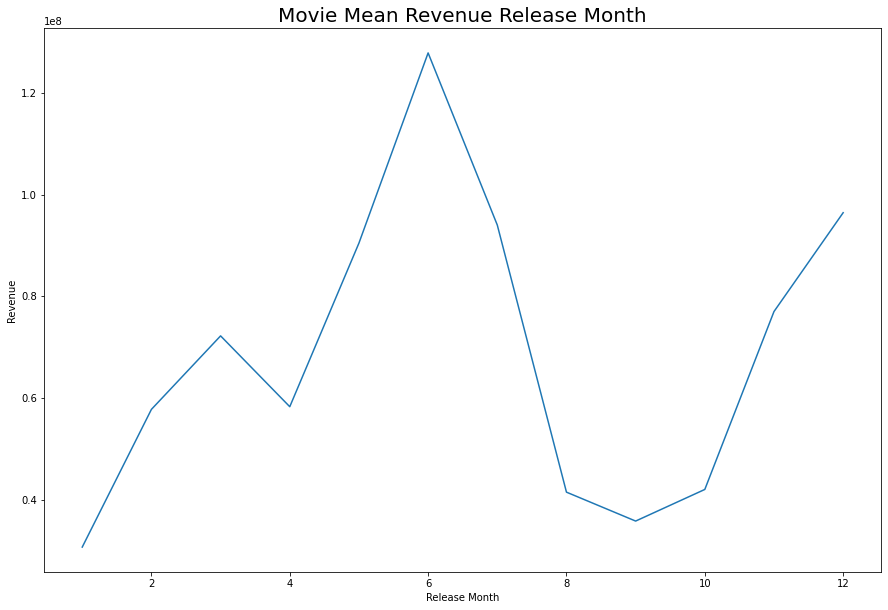

In [20]:
train['meanRevenueByMonth'] = train.groupby("release_month")["revenue"].aggregate('mean')
train['meanRevenueByMonth'].plot(figsize=(15,10))
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

Release day of week vs Revenue

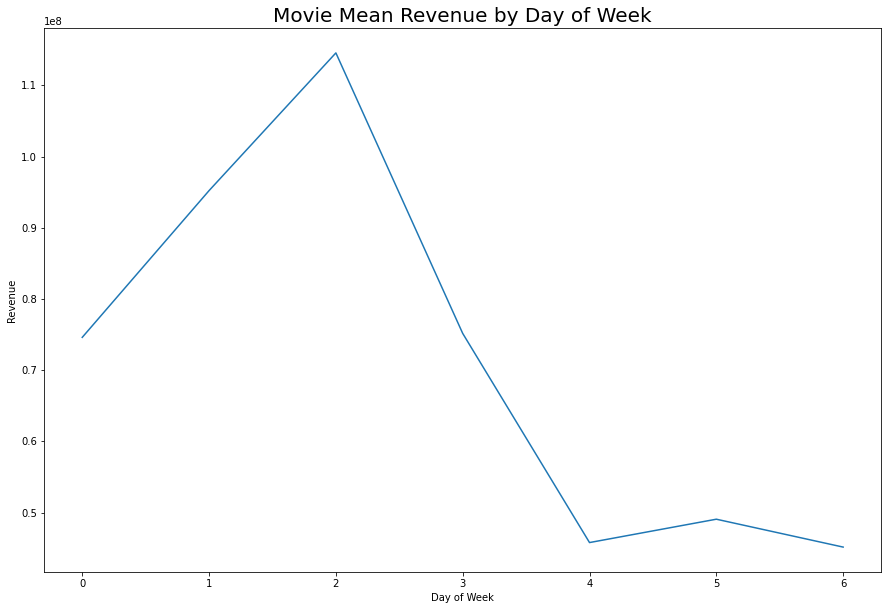

In [21]:
train['meanRevenueByDayOfWeek'] = train.groupby("release_dayofweek")["revenue"].aggregate('mean')
train['meanRevenueByDayOfWeek'].plot(figsize=(15,10))
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Day of Week",fontsize=20)
plt.show()

Count Genres in Train set

In [ ]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train = train
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)
print("Action Genres Movie           ", train[train.Action == 1].shape[0])
print("Adventure Genres Movie        ", train[train.Adventure == 1].shape[0])
print("Animation Genres Movie        ", train[train.Animation == 1].shape[0])
print("Comedy Genres Movie           ", train[train.Comedy == 1].shape[0])
print("Crime Genres Movie            ", train[train.Crime == 1].shape[0])
print("Documentary Genres Movie      ", train[train.Documentary == 1].shape[0])
print("Drama Genres Movie            ", train[train.Drama == 1].shape[0])
print("Family Genres Movie           ", train[train.Family == 1].shape[0])
print("Fantasy Genres Movie          ", train[train.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", train[train.Foreign == 1].shape[0])
print("History Genres Movie          ", train[train.History == 1].shape[0])
print("Music Genres Movie            ", train[train.Music == 1].shape[0])
print("Mystery Genres Movie          ", train[train.Mystery == 1].shape[0])
print("Romance Genres Movie          ", train[train.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", train[train['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie         ", train[train['TV Movie'] == 1].shape[0])
print("Thriller Genres Movie         ", train[train.Thriller == 1].shape[0])
print("War Genres Movie              ", train[train.War == 1].shape[0])
print("Western Genres Movie          ", train[train.Western == 1].shape[0])

Action Genres Movie            741
Adventure Genres Movie         439
Animation Genres Movie         141
Comedy Genres Movie            1028
Crime Genres Movie             469
Documentary Genres Movie       87
Drama Genres Movie             1531
Family Genres Movie            260
Fantasy Genres Movie           232
Foreign Genres Movie           31
History Genres Movie           132
Music Genres Movie             100
Mystery Genres Movie           225
Romance Genres Movie           571
Science Fiction Genres Movie   290
TV Movie Genres Movie          1
Thriller Genres Movie          789
War Genres Movie               100
Western Genres Movie           43


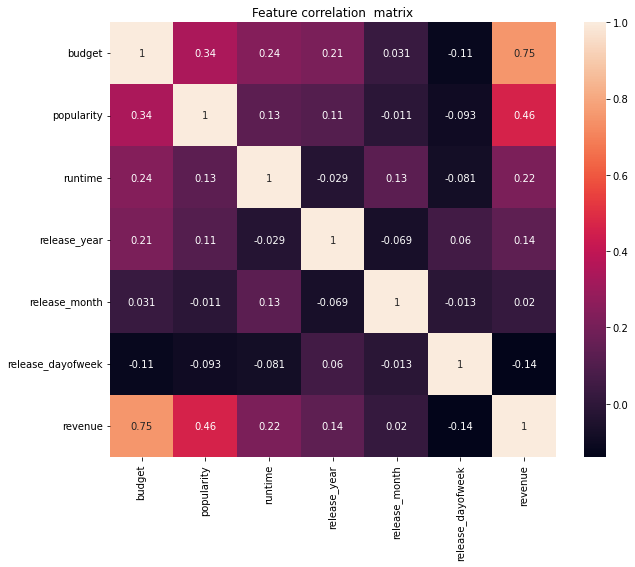

In [24]:
train = train[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']]
f,ax = plt.subplots(figsize=(10, 8))
plt.title('Feature correlation  matrix')
sns.heatmap(train.corr(), annot=True)
plt.show()

# **Feature Engineering & Prediction**
Reference: https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat


In [107]:
def prepare(df):
    global json_cols
    global train_dict

    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900
    
    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek 
    df['release_quarter'] = releaseDate.dt.quarter     


    df['originalBudget'] = df['budget']
    df['inflationBudget'] = df['budget'] + df['budget']*1.8/100*(2021-df['release_year']) #Inflation simple formula
    df['budget'] = np.log1p(df['budget']) 
    
    
    # Thanks to this Kernel for the next 7 features https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

    
    
    df['_popularity_mean_year'] = df['popularity'] / df.groupby("release_year")["popularity"].transform('mean')
    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
    
    df['has_homepage'] = 1
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    # get collection id
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
    # df['original_title_letter_count'] = df['original_title'].str.len() 
    # df['original_title_word_count'] = df['original_title'].str.split().str.len() 


    # df['title_word_count'] = df['title'].str.split().str.len()
    # df['overview_word_count'] = df['overview'].str.split().str.len()
    # df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    # df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
    # df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
    # df['cast_count'] = df['cast'].apply(lambda x : len(x))
    # df['crew_count'] = df['crew'].apply(lambda x : len(x))
    

    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
  #  df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].aggregate('mean')
  #  df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].aggregate('mean')
    df['medianBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('median')

    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df

train = pd.read_csv('train.csv')

#Clean Datapower_six 
 
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test = pd.read_csv('test.csv')

#Clean Data
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30


test['revenue'] = np.nan

# features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data
#train = pd.merge(train, pd.read_csv('../input/tmdb-competition-additional-features/TrainAdditionalFeatures.csv'), how='left', on=['imdb_id'])
#test = pd.merge(test, pd.read_csv('../input/tmdb-competition-additional-features/TestAdditionalFeatures.csv'), how='left', on=['imdb_id'])



#additionalTrainData = pd.read_csv('../input/tmdb-box-office-prediction-more-training-data/additionalTrainData.csv')
#additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
#additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
#train = pd.concat([train, additionalTrainData])

#train = pd.merge(train, additionalTrainData, how='left', on=['imdb_id'],axis=1)

print(train.columns)
print(train.shape)
train['revenue'] = np.log1p(train['revenue'].astype('int32'))
y = train['revenue'].values

json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))
    
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

# remove cateogry with bias and low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
             
all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:] 

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
(3000, 23)


100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


In [26]:
print(train.shape)
print(test.shape)
print(y.shape)

(3000, 182)
(4398, 182)
(3000,)


# LR w/o Text

In [27]:
# Preprocessing training data
x_train = np.array(train)
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T

x_train1,x_val1,y_train1,y_val1 = train_test_split(x_train,y_train, test_size=0.05)

In [28]:
# Pre-processing Test data
x_test = np.array(test)

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test = temp.T

In [29]:
reg = LinearRegression().fit(x_train1, y_train1)

y_train_pred = reg.predict(x_train1)
print('Training RMSLE on linear regression: ',np.sum(np.mean(np.sqrt((y_train_pred - y_train1)**2))))

Training RMSLE on linear regression:  1.4243676285467035


In [30]:
y_val_pred = reg.predict(x_val1)
print('validation RMSLE on linear regression: ',np.sum(np.mean(np.sqrt((y_val_pred - y_val1)**2))))

validation RMSLE on linear regression:  1.2332205970362076


In [31]:
y_test = reg.predict(x_test)

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_lr_wo_text.csv", index=False)

# ANN w/o Text data

In [32]:
# Preprocessing training data
x_train = np.array(train)
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T
np.shape(x_train)

(3000, 182)

In [33]:
x_train = np.reshape(x_train,(3000,1,182))

In [34]:
# Pre-processing Test data
x_test = np.array(test)

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test= temp.T
np.shape(x_test)

(4398, 182)

In [35]:
x_test= np.reshape(x_test,(4398,1,182))

In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = (1,182)))
ann_model.add(tf.keras.layers.Dense(128, activation = 'relu',))
ann_model.add(tf.keras.layers.Dense(512, activation = 'relu',))
ann_model.add(tf.keras.layers.Dense(1024, activation = 'relu',))
ann_model.add(tf.keras.layers.Dense(128, activation = 'relu',))
ann_model.add(tf.keras.layers.Dense(64, activation = 'relu',))
ann_model.add(tf.keras.layers.Dense(1, activation='relu'))

In [37]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 128)            23424     
                                                                 
 dense_1 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_2 (Dense)             (None, 1, 512)            66048     
                                                                 
 dense_3 (Dense)             (None, 1, 1024)           525312    
                                                                 
 dense_4 (Dense)             (None, 1, 128)            131200    
                                                                 
 dense_5 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              6

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
ann_model.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['mse']) 
history = ann_model.fit(x_train, y_train, validation_split=0.15, batch_size=256, epochs=100, callbacks = [callback])

Epoch 1/100
10/10 [==============================] - 3s 47ms/step - loss: 245.0366 - mse: 245.0366 - val_loss: 236.2661 - val_mse: 236.2661
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 150.4377 - mse: 150.4377 - val_loss: 99.5600 - val_mse: 99.5600
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 46.6481 - mse: 46.6481 - val_loss: 19.0296 - val_mse: 19.0296
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 21.7351 - mse: 21.7351 - val_loss: 16.8761 - val_mse: 16.8761
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 14.2591 - mse: 14.2591 - val_loss: 14.8194 - val_mse: 14.8194
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 12.3755 - mse: 12.3755 - val_loss: 11.6326 - val_mse: 11.6326
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 10.9808 - mse: 10.9808 - val_loss: 10.8653 - val_mse: 10.8653
Epoch 8/100
10/10 [=======================

In [39]:
y_test = ann_model.predict(x_test)
y_test[np.where(np.isinf(np.expm1(y_test)))] = 0
y_test = np.reshape(y_test, (4398))

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_ann_wo_text.csv", index=False)

# Extracting text data features using intermediate feature maps from GRU based dense net

In [76]:
train1 = pd.read_csv("train.csv")
overview = train1['overview']  #pd.concat([train1['overview'], train1['revenue']])
rev = train1['revenue']
rev = np.log1p(rev)
overview = np.asarray(overview).astype(str)
VOCAB_SIZE = 5000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(overview)

In [77]:
tf.keras.backend.clear_session()
model1 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        mask_zero=True),

    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              198144    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [78]:
model1.compile(loss=tf.losses.MSE,
              optimizer=tf.keras.optimizers.Adam(5e-4),
              metrics=['mse'])
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1)
# if(tf.test.gpu_device_name() == '/device:GPU:0'):
#   history = model1.fit(overview, rev, validation_split=0.15, batch_size=128, epochs=15)
history = model1.fit(overview, rev, validation_split=0.15, batch_size=128, epochs=15,callbacks = [callback])

Epoch 1/15
20/20 [==============================] - 14s 260ms/step - loss: 239.2003 - mse: 239.2003 - val_loss: 138.3656 - val_mse: 138.3656
Epoch 2/15
20/20 [==============================] - 2s 109ms/step - loss: 44.3642 - mse: 44.3642 - val_loss: 14.9455 - val_mse: 14.9455
Epoch 3/15
20/20 [==============================] - 2s 110ms/step - loss: 14.2409 - mse: 14.2409 - val_loss: 10.9822 - val_mse: 10.9822
Epoch 4/15
20/20 [==============================] - 2s 105ms/step - loss: 10.6946 - mse: 10.6946 - val_loss: 10.0962 - val_mse: 10.0962
Epoch 5/15
20/20 [==============================] - 2s 106ms/step - loss: 9.3528 - mse: 9.3528 - val_loss: 9.2913 - val_mse: 9.2913
Epoch 6/15
20/20 [==============================] - 2s 105ms/step - loss: 8.0135 - mse: 8.0135 - val_loss: 9.0014 - val_mse: 9.0014
Epoch 7/15
20/20 [==============================] - 2s 104ms/step - loss: 7.0088 - mse: 7.0088 - val_loss: 8.9790 - val_mse: 8.9790
Epoch 8/15
20/20 [==============================] - 2s 

In [79]:
overview_op = tf.keras.Model(inputs=model1.input, outputs=model1.get_layer('dense_3').output)
# overview_op = tf.keras.Model(inputs=model1.input, outputs=model1.get_layer('bidirectional').output)
over_feats = overview_op(overview)
over_feats = over_feats.numpy()
over_output = model1.predict(overview)

In [80]:
tag_line = train1['tagline']
tag_line = np.asarray(tag_line).astype(str)
VOCAB_SIZE = 5000
encoder1 = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder1.adapt(tag_line)

In [81]:
tf.keras.backend.clear_session()
model2 = tf.keras.Sequential([
    encoder1,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,

        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='leaky_relu'), 
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              198144    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [82]:
model2.compile(loss=tf.losses.MSE,
              optimizer=tf.keras.optimizers.Adam(5e-4),
              metrics=['mse'])
# if(tf.test.gpu_device_name() == '/device:GPU:0'):
#   history = model2.fit(tag_line, rev, validation_split=0.15, batch_size=128, epochs=15)
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1)
history = model2.fit(tag_line, rev, validation_split=0.15, batch_size=128, epochs=15,callbacks = [callback])

Epoch 1/15
20/20 [==============================] - 13s 204ms/step - loss: 246.3138 - mse: 246.3138 - val_loss: 186.6534 - val_mse: 186.6534
Epoch 2/15
20/20 [==============================] - 1s 33ms/step - loss: 69.1358 - mse: 69.1358 - val_loss: 23.4139 - val_mse: 23.4139
Epoch 3/15
20/20 [==============================] - 1s 33ms/step - loss: 15.3873 - mse: 15.3873 - val_loss: 13.3361 - val_mse: 13.3361
Epoch 4/15
20/20 [==============================] - 1s 32ms/step - loss: 10.8658 - mse: 10.8658 - val_loss: 10.9767 - val_mse: 10.9767
Epoch 5/15
20/20 [==============================] - 1s 32ms/step - loss: 8.7609 - mse: 8.7609 - val_loss: 10.2168 - val_mse: 10.2168
Epoch 6/15
20/20 [==============================] - 1s 33ms/step - loss: 7.9637 - mse: 7.9637 - val_loss: 10.0023 - val_mse: 10.0023
Epoch 7/15
20/20 [==============================] - 1s 32ms/step - loss: 6.9408 - mse: 6.9408 - val_loss: 10.0210 - val_mse: 10.0210


In [83]:
tag1 = tf.keras.Model(inputs=model2.input, outputs=model2.get_layer('dense_3').output)
# tag1 = tf.keras.Model(inputs=model2.input, outputs=model2.get_layer('bidirectional').output)
tag_feats = tag1(tag_line)
tag_feats = tag_feats.numpy()
tag_output = model1.predict(tag_line)

# LR only Text data

In [84]:
# Preprocessing training data
x_train = np.hstack((over_output,tag_output))
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T
print(x_train.shape)
x_train1,x_val1,y_train1,y_val1 = train_test_split(x_train,y_train, test_size=0.05)

(3000, 2)


In [85]:
# Pre-processing Test data
test2 = pd.read_csv('test.csv')
overview_test = test2['overview']
tagline_test = test2['tagline']

overview_test = np.asarray(overview_test).astype(str)
tagline_test = np.asarray(tagline_test).astype(str)

over_test = model1.predict(overview_test)
tag_test = model2.predict(tagline_test)

x_test = np.hstack((over_test,tag_test))

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test= temp.T

In [86]:
reg = LinearRegression().fit(x_train1, y_train1)

y_train_pred = reg.predict(x_train1)
print('Training RMSLE on linear regression only text data: ',np.sum(np.mean(np.sqrt((y_train_pred - y_train1)**2))))

Training RMSLE on linear regression only text data:  1.4977941737009577


In [87]:
y_val_pred = reg.predict(x_val1)
print('validation RMSLE on linear regression: ',np.sum(np.mean(np.sqrt((y_val_pred - y_val1)**2))))

validation RMSLE on linear regression:  1.5594530631869705


In [89]:
y_test = reg.predict(x_test)

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_lr_o_text.csv", index=False)

# ANN only Text data

In [90]:
# Preprocessing training data
x_train = np.hstack((over_output,tag_output))
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T
print(x_train.shape)

(3000, 2)


In [91]:
# Pre-processing Test data
test2 = pd.read_csv('test.csv')
overview_test = test2['overview']
tagline_test = test2['tagline']

overview_test = np.asarray(overview_test).astype(str)
tagline_test = np.asarray(tagline_test).astype(str)

over_test = model1.predict(overview_test)
tag_test = model2.predict(tagline_test)

x_test = np.hstack((over_test,tag_test))

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test = temp.T
print(x_test.shape)

(4398, 2)


In [92]:
x_train = np.reshape(x_train,(3000,1,2))
x_test = np.reshape(x_test,(4398,1,2))

In [93]:
tf.keras.backend.clear_session()

corr_model = tf.keras.models.Sequential()
corr_model.add(tf.keras.layers.Dense(128, activation = 'leaky_relu', input_shape = (1,2)))    
corr_model.add(tf.keras.layers.Dense(64, activation = 'leaky_relu'))
corr_model.add(tf.keras.layers.Dense(1, activation = 'leaky_relu'))
corr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 128)            384       
                                                                 
 dense_1 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [94]:
corr_model.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.009), metrics=['mse']) 
# if(tf.test.gpu_device_name() == '/device:GPU:0'):
#   history = corr_model.fit(x_train, y, validation_split=0.15, batch_size=256, epochs=75)

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
history = corr_model.fit(x_train, y, validation_split=0.15, batch_size=256, epochs=75, callbacks = [callback])

Epoch 1/75
10/10 [==============================] - 1s 31ms/step - loss: 181.4693 - mse: 181.4693 - val_loss: 50.8067 - val_mse: 50.8067
Epoch 2/75
10/10 [==============================] - 0s 8ms/step - loss: 43.2675 - mse: 43.2675 - val_loss: 20.4516 - val_mse: 20.4516
Epoch 3/75
10/10 [==============================] - 0s 8ms/step - loss: 27.1576 - mse: 27.1576 - val_loss: 24.4958 - val_mse: 24.4958
Epoch 4/75
10/10 [==============================] - 0s 8ms/step - loss: 18.0193 - mse: 18.0193 - val_loss: 12.4641 - val_mse: 12.4641
Epoch 5/75
10/10 [==============================] - 0s 7ms/step - loss: 13.5935 - mse: 13.5935 - val_loss: 12.1142 - val_mse: 12.1142
Epoch 6/75
10/10 [==============================] - 0s 8ms/step - loss: 11.2878 - mse: 11.2878 - val_loss: 8.8613 - val_mse: 8.8613
Epoch 7/75
10/10 [==============================] - 0s 8ms/step - loss: 10.3593 - mse: 10.3593 - val_loss: 8.7611 - val_mse: 8.7611
Epoch 8/75
10/10 [==============================] - 0s 8ms/step

In [95]:
y_test = corr_model.predict(x_test)

y_test[np.where(np.isinf(np.expm1(y_test)))] = 0
y_test = np.reshape(y_test, (4398))

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_ann_o_text.csv", index=False)

# LR with text data

In [96]:
# Pre-processing training data
x_train = train
x_train = np.hstack((x_train,over_feats,tag_feats))
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T
print(x_train.shape)
x_train1,x_val1,y_train1,y_val1 = train_test_split(x_train,y_train, test_size=0.05)

(3000, 246)


In [97]:
# Pre-processing test data
x_test = test

test2 = pd.read_csv('test.csv')
overview_test = test2['overview']
tagline_test = test2['tagline']

overview_test = np.asarray(overview_test).astype(str)
tagline_test = np.asarray(tagline_test).astype(str)

test_overview = overview_op(overview_test)
test_tagline = tag1(tagline_test)

x_test =np.hstack((x_test,test_overview,test_tagline))

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test= temp.T

In [98]:
reg = LinearRegression().fit(x_train1, y_train1)

y_train_pred = reg.predict(x_train1)
print('Training RMSLE on linear regression: ',np.sum(np.mean(np.sqrt((y_train_pred - y_train1)**2))))

Training RMSLE on linear regression:  1.1706152954085518


In [99]:
y_val_pred = reg.predict(x_val1)
print('validation RMSLE on linear regression: ',np.sum(np.mean(np.sqrt((y_val_pred - y_val1)**2))))

validation RMSLE on linear regression:  1.1886565525081003


In [100]:
y_test = reg.predict(x_test)

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_lr_w_text.csv", index=False)

# ANN with text data

In [101]:
# Pre-processing training data
x_train = train
x_train = np.hstack((x_train,over_feats,tag_feats))
y_train = np.array(y)

indices = np.where(np.isinf(x_train))

x_train[indices] = 0.0

temp = x_train.T
mean = []
std = []
for i in range(len(temp)):
  mean.append(np.mean(temp[i]))
  std.append(np.std(temp[i]))
  temp[i] = (temp[i] - np.mean(temp[i]))/(np.std(temp[i]) + 1e-9)
x_train = temp.T
print(x_train.shape)


(3000, 246)


In [102]:
# Pre-processing test data
x_test = test

test2 = pd.read_csv('test.csv')
overview_test = test2['overview']
tagline_test = test2['tagline']

overview_test = np.asarray(overview_test).astype(str)
tagline_test = np.asarray(tagline_test).astype(str)

test_overview = overview_op(overview_test)
test_tagline = tag1(tagline_test)

x_test =np.hstack((x_test,test_overview,test_tagline))

indices = np.where(np.isinf(x_test))
x_test[indices] = 0.0

temp = x_test.T
for i in range(len(temp)):
  temp[i] = (temp[i] - mean[i])/(std[i] + 1e-9)
x_test = temp.T
print(x_test.shape)

(4398, 246)


In [103]:
x_train = np.reshape(x_train,(3000,1,246))
x_test = np.reshape(x_test,(4398,1,246))


In [104]:
tf.keras.backend.clear_session()

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(128, activation = 'leaky_relu', input_shape = (1,246)))     # leaky_relu
ann_model.add(tf.keras.layers.Dense(128, activation = 'leaky_relu'))
ann_model.add(tf.keras.layers.Dense(512, activation = 'relu'))
ann_model.add(tf.keras.layers.Dense(1024, activation = 'leaky_relu'))
ann_model.add(tf.keras.layers.Dense(512, activation = 'leaky_relu'))
ann_model.add(tf.keras.layers.Dense(256, activation = 'relu'))
ann_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
ann_model.add(tf.keras.layers.Dense(64, activation = 'leaky_relu'))
ann_model.add(tf.keras.layers.Dense(32, activation = 'relu'))
ann_model.add(tf.keras.layers.Dense(1, activation = 'leaky_relu'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 128)            31616     
                                                                 
 dense_1 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_2 (Dense)             (None, 1, 512)            66048     
                                                                 
 dense_3 (Dense)             (None, 1, 1024)           525312    
                                                                 
 dense_4 (Dense)             (None, 1, 512)            524800    
                                                                 
 dense_5 (Dense)             (None, 1, 256)            131328    
                                                                 
 dense_6 (Dense)             (None, 1, 128)            3

In [105]:
ann_model.compile(loss='mse', optimizer= tf.keras.optimizers.Adam(learning_rate=0.00055), metrics=['mse']) 
# if(tf.test.gpu_device_name() == '/device:GPU:0'):
#   history = ann_model.fit(x_train, y, validation_split=0.15, batch_size=256, epochs=350)

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 15)
history = ann_model.fit(x_train, y, validation_split=0.15, batch_size=256, epochs=350, callbacks=[callback])

Epoch 1/350
10/10 [==============================] - 2s 63ms/step - loss: 169.5421 - mse: 169.5421 - val_loss: 65.6271 - val_mse: 65.6271
Epoch 2/350
10/10 [==============================] - 0s 15ms/step - loss: 50.2646 - mse: 50.2646 - val_loss: 32.3823 - val_mse: 32.3823
Epoch 3/350
10/10 [==============================] - 0s 16ms/step - loss: 30.7078 - mse: 30.7078 - val_loss: 28.0527 - val_mse: 28.0527
Epoch 4/350
10/10 [==============================] - 0s 15ms/step - loss: 21.9218 - mse: 21.9218 - val_loss: 22.5975 - val_mse: 22.5975
Epoch 5/350
10/10 [==============================] - 0s 15ms/step - loss: 18.1322 - mse: 18.1322 - val_loss: 18.4069 - val_mse: 18.4069
Epoch 6/350
10/10 [==============================] - 0s 17ms/step - loss: 15.6586 - mse: 15.6586 - val_loss: 15.6419 - val_mse: 15.6419
Epoch 7/350
10/10 [==============================] - 0s 15ms/step - loss: 13.6360 - mse: 13.6360 - val_loss: 13.9171 - val_mse: 13.9171
Epoch 8/350
10/10 [===========================

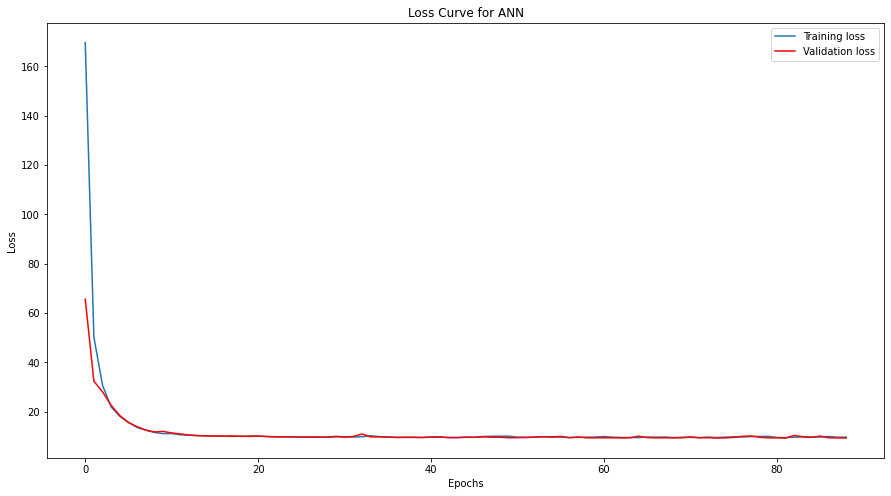

In [106]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'],label = 'Training loss')
plt.plot(history.history['val_loss'], '-r',label = 'Validation loss')
plt.title('Loss Curve for ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
y_test = ann_model.predict(x_test)

y_test[np.where(np.isinf(np.expm1(y_test)))] = 0
y_test = np.reshape(y_test, (4398))

sub = pd.read_csv('sample_submission.csv')
df_sub = pd.DataFrame()
df_sub['id'] = sub['id']
df_sub['revenue'] = np.expm1(y_test)
#print(df_sub['revenue'])
df_sub.to_csv("submission_ann_w_text.csv", index=False)

# Latest Movie predictions
The below code blocks in this section are experimentation for trying our code on latest movie data from TMDB<br>
Please do not run the code as there are still some bugs which are not fixed.

In [ ]:
# !pip install tmdbv3api

In [ ]:
# from tmdbv3api import TMDb
# from tmdbv3api import Movie
# tmdb = TMDb()
# tmdb.api_key = '2a6c931e91b9ea3e5e82757d4b2138ce'
# tmdb.language = 'en'
# tmdb.debug = True

# movie = Movie()
# # for example the movie with id=862
# m = movie.details(566525)
# dataFrame = pd.DataFrame([m.keys(),m.values()])
# print("Gyaan for ", m['title'])
# for i in range(len(m.keys())):
#   print(list(m.keys())[i], " : ",m[list(m.keys())[i]])

# tenet = movie.details(577922)
# df2 = pd.DataFrame([tenet.values()])
# dataFrame3 = pd.concat([dataFrame, df2])

Gyaan for  Shang-Chi and the Legend of the Ten Rings
adult  :  False
backdrop_path  :  /cinER0ESG0eJ49kXlExM0MEWGxW.jpg
belongs_to_collection  :  None
budget  :  150000000
genres  :  [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}]
homepage  :  https://www.marvel.com/movies/shang-chi-and-the-legend-of-the-ten-rings
id  :  566525
imdb_id  :  tt9376612
original_language  :  en
original_title  :  Shang-Chi and the Legend of the Ten Rings
overview  :  Shang-Chi must confront the past he thought he left behind when he is drawn into the web of the mysterious Ten Rings organization.
popularity  :  8300.401
poster_path  :  /1BIoJGKbXjdFDAqUEiA2VHqkK1Z.jpg
production_companies  :  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZxCGEKTXaQ.png', 'name': 'Marvel Studios', 'origin_country': 'US'}]
production_countries  :  [{'iso_3166_1': 'US', 'name': 'United States of America'}]
release_date  :  2021-09-01
revenue  :  430238384
runtime  :  132
spoken_lan

In [ ]:
# def prepare(df):
#     global json_cols
#     global train_dict

#     df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
#     df['release_year'] = df['release_year']
#     df.loc[ (df['release_year'] <= 19) & (df['release_year'] < 100), "release_year"] += 2000
#     df.loc[ (df['release_year'] > 19)  & (df['release_year'] < 100), "release_year"] += 1900
    
#     releaseDate = pd.to_datetime(df['release_date']) 
#     df['release_dayofweek'] = releaseDate.dt.dayofweek 
#     df['release_quarter'] = releaseDate.dt.quarter     


#     df['originalBudget'] = df['budget']
#     df['inflationBudget'] = df['budget'] + df['budget']*1.8/100*(2021-df['release_year']) #Inflation simple formula
#     df['budget'] = np.log1p(df['budget']) 
    
    
#     # Thanks to this Kernel for the next 7 features https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation
#     df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
#     df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
#     df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
#     df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
#     le = LabelEncoder()
#     le.fit(list(df['_collection_name'].fillna('')))
#     df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
#     df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
#     df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

    
    
#     df['_popularity_mean_year'] = df['popularity'] / df.groupby("release_year")["popularity"].transform('mean')
#     df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
#     df['_budget_popularity_ratio'] = df['budget']/df['popularity']
#     df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
#     df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
#     df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']
    
#     df['has_homepage'] = 1
#     df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 0
    
#     df['isbelongs_to_collectionNA'] = 0
#     df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
#     df['isTaglineNA'] = 0
#     df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

#     df['isOriginalLanguageEng'] = 0 
#     df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
#     df['isTitleDifferent'] = 1
#     df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

#     df['isMovieReleased'] = 1
#     df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

#     # get collection id
#     df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
#     # df['original_title_letter_count'] = df['original_title'].str.len() 
#     # df['original_title_word_count'] = df['original_title'].str.split().str.len() 


#     # df['title_word_count'] = df['title'].str.split().str.len()
#     # df['overview_word_count'] = df['overview'].str.split().str.len()
#     # df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
#     # df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
#     # df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
#     # df['cast_count'] = df['cast'].apply(lambda x : len(x))
#     # df['crew_count'] = df['crew'].apply(lambda x : len(x))
    

#     df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
#     df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
#     df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
#   #  df['meantotalVotesByYear'] = df.groupby("release_year")["totalVotes"].aggregate('mean')
#   #  df['meanTotalVotesByRating'] = df.groupby("rating")["totalVotes"].aggregate('mean')
#     df['medianBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('median')

#     for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
#         df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
#         temp = df[col].str.get_dummies(sep=',')
#         df = pd.concat([df, temp], axis=1, sort=False)
#     df.drop(['genres_etc'], axis = 1, inplace = True)
    
#     df = df.drop(['id', 'revenue','belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
#     ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
#     ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id'
#     ],axis=1)
    
#     df.fillna(value=0.0, inplace = True) 

#     return df

# train = pd.read_csv('train.csv')

# #power_six = train.id[train.budget > 1000][train.revenue < 100]

# #for k in power_six :
# #    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000
# #Clean Datapower_six 
 
# train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
# train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
# train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
# train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
# train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
# train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
# train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
# train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
# train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
# train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
# train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
# train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
# train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
# train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
# train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
# train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
# train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
# train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
# train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
# train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
# train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
# train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
# train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
# train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
# train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
# train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
# train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
# train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
# train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
# train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
# train.loc[train['id'] == 335,'budget'] = 2 
# train.loc[train['id'] == 348,'budget'] = 12
# train.loc[train['id'] == 470,'budget'] = 13000000 
# train.loc[train['id'] == 513,'budget'] = 1100000
# train.loc[train['id'] == 640,'budget'] = 6 
# train.loc[train['id'] == 696,'budget'] = 1
# train.loc[train['id'] == 797,'budget'] = 8000000 
# train.loc[train['id'] == 850,'budget'] = 1500000
# train.loc[train['id'] == 1199,'budget'] = 5 
# train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
# train.loc[train['id'] == 1347,'budget'] = 1
# train.loc[train['id'] == 1755,'budget'] = 2
# train.loc[train['id'] == 1801,'budget'] = 5
# train.loc[train['id'] == 1918,'budget'] = 592 
# train.loc[train['id'] == 2033,'budget'] = 4
# train.loc[train['id'] == 2118,'budget'] = 344 
# train.loc[train['id'] == 2252,'budget'] = 130
# train.loc[train['id'] == 2256,'budget'] = 1 
# train.loc[train['id'] == 2696,'budget'] = 10000000


# # test = pd.read_csv('test.csv')
# test = dataFrame3

# #Clean Data
# # test.loc[test['id'] == 6733,'budget'] = 5000000
# # test.loc[test['id'] == 3889,'budget'] = 15000000
# # test.loc[test['id'] == 6683,'budget'] = 50000000
# # test.loc[test['id'] == 5704,'budget'] = 4300000
# # test.loc[test['id'] == 6109,'budget'] = 281756
# # test.loc[test['id'] == 7242,'budget'] = 10000000
# # test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
# # test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
# # test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
# # test.loc[test['id'] == 3033,'budget'] = 250 
# # test.loc[test['id'] == 3051,'budget'] = 50
# # test.loc[test['id'] == 3084,'budget'] = 337
# # test.loc[test['id'] == 3224,'budget'] = 4  
# # test.loc[test['id'] == 3594,'budget'] = 25  
# # test.loc[test['id'] == 3619,'budget'] = 500  
# # test.loc[test['id'] == 3831,'budget'] = 3  
# # test.loc[test['id'] == 3935,'budget'] = 500  
# # test.loc[test['id'] == 4049,'budget'] = 995946 
# # test.loc[test['id'] == 4424,'budget'] = 3  
# # test.loc[test['id'] == 4460,'budget'] = 8  
# # test.loc[test['id'] == 4555,'budget'] = 1200000 
# # test.loc[test['id'] == 4624,'budget'] = 30 
# # test.loc[test['id'] == 4645,'budget'] = 500 
# # test.loc[test['id'] == 4709,'budget'] = 450 
# # test.loc[test['id'] == 4839,'budget'] = 7
# # test.loc[test['id'] == 3125,'budget'] = 25 
# # test.loc[test['id'] == 3142,'budget'] = 1
# # test.loc[test['id'] == 3201,'budget'] = 450
# # test.loc[test['id'] == 3222,'budget'] = 6
# # test.loc[test['id'] == 3545,'budget'] = 38
# # test.loc[test['id'] == 3670,'budget'] = 18
# # test.loc[test['id'] == 3792,'budget'] = 19
# # test.loc[test['id'] == 3881,'budget'] = 7
# # test.loc[test['id'] == 3969,'budget'] = 400
# # test.loc[test['id'] == 4196,'budget'] = 6
# # test.loc[test['id'] == 4221,'budget'] = 11
# # test.loc[test['id'] == 4222,'budget'] = 500
# # test.loc[test['id'] == 4285,'budget'] = 11
# # test.loc[test['id'] == 4319,'budget'] = 1
# # test.loc[test['id'] == 4639,'budget'] = 10
# # test.loc[test['id'] == 4719,'budget'] = 45
# # test.loc[test['id'] == 4822,'budget'] = 22
# # test.loc[test['id'] == 4829,'budget'] = 20
# # test.loc[test['id'] == 4969,'budget'] = 20
# # test.loc[test['id'] == 5021,'budget'] = 40 
# # test.loc[test['id'] == 5035,'budget'] = 1 
# # test.loc[test['id'] == 5063,'budget'] = 14 
# # test.loc[test['id'] == 5119,'budget'] = 2 
# # test.loc[test['id'] == 5214,'budget'] = 30 
# # test.loc[test['id'] == 5221,'budget'] = 50 
# # test.loc[test['id'] == 4903,'budget'] = 15
# # test.loc[test['id'] == 4983,'budget'] = 3
# # test.loc[test['id'] == 5102,'budget'] = 28
# # test.loc[test['id'] == 5217,'budget'] = 75
# # test.loc[test['id'] == 5224,'budget'] = 3 
# # test.loc[test['id'] == 5469,'budget'] = 20 
# # test.loc[test['id'] == 5840,'budget'] = 1 
# # test.loc[test['id'] == 5960,'budget'] = 30
# # test.loc[test['id'] == 6506,'budget'] = 11 
# # test.loc[test['id'] == 6553,'budget'] = 280
# # test.loc[test['id'] == 6561,'budget'] = 7
# # test.loc[test['id'] == 6582,'budget'] = 218
# # test.loc[test['id'] == 6638,'budget'] = 5
# # test.loc[test['id'] == 6749,'budget'] = 8 
# # test.loc[test['id'] == 6759,'budget'] = 50 
# # test.loc[test['id'] == 6856,'budget'] = 10
# # test.loc[test['id'] == 6858,'budget'] =  100
# # test.loc[test['id'] == 6876,'budget'] =  250
# # test.loc[test['id'] == 6972,'budget'] = 1
# # test.loc[test['id'] == 7079,'budget'] = 8000000
# # test.loc[test['id'] == 7150,'budget'] = 118
# # test.loc[test['id'] == 6506,'budget'] = 118
# # test.loc[test['id'] == 7225,'budget'] = 6
# # test.loc[test['id'] == 7231,'budget'] = 85
# # test.loc[test['id'] == 5222,'budget'] = 5
# # test.loc[test['id'] == 5322,'budget'] = 90
# # test.loc[test['id'] == 5350,'budget'] = 70
# # test.loc[test['id'] == 5378,'budget'] = 10
# # test.loc[test['id'] == 5545,'budget'] = 80
# # test.loc[test['id'] == 5810,'budget'] = 8
# # test.loc[test['id'] == 5926,'budget'] = 300
# # test.loc[test['id'] == 5927,'budget'] = 4
# # test.loc[test['id'] == 5986,'budget'] = 1
# # test.loc[test['id'] == 6053,'budget'] = 20
# # test.loc[test['id'] == 6104,'budget'] = 1
# # test.loc[test['id'] == 6130,'budget'] = 30
# # test.loc[test['id'] == 6301,'budget'] = 150
# # test.loc[test['id'] == 6276,'budget'] = 100
# # test.loc[test['id'] == 6473,'budget'] = 100
# # test.loc[test['id'] == 6842,'budget'] = 30


# # test['revenue'] = np.nan

# # features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data
# #train = pd.merge(train, pd.read_csv('../input/tmdb-competition-additional-features/TrainAdditionalFeatures.csv'), how='left', on=['imdb_id'])
# #test = pd.merge(test, pd.read_csv('../input/tmdb-competition-additional-features/TestAdditionalFeatures.csv'), how='left', on=['imdb_id'])



# #additionalTrainData = pd.read_csv('../input/tmdb-box-office-prediction-more-training-data/additionalTrainData.csv')
# #additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
# #additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
# #train = pd.concat([train, additionalTrainData])

# #train = pd.merge(train, additionalTrainData, how='left', on=['imdb_id'],axis=1)

# print(train.columns)
# print(train.shape)
# train['revenue'] = np.log1p(train['revenue'].astype('int32'))
# y = train['revenue'].values

# json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

# def get_dictionary(s):
#     try:
#         d = eval(s)
#     except:
#         d = {}
#     return d

# for col in tqdm(json_cols + ['belongs_to_collection']) :
#     train[col] = train[col].apply(lambda x : get_dictionary(x))
#     test[col] = test[col].apply(lambda x : get_dictionary(x))
    
# def get_json_dict(df) :
#     global json_cols
#     result = dict()
#     for e_col in json_cols :
#         d = dict()
#         rows = df[e_col].values
#         for row in rows :
#             if row is None : continue
#             for i in row :
#                 if i['name'] not in d :
#                     d[i['name']] = 0
#                 d[i['name']] += 1
#         result[e_col] = d
#     return result

# train_dict = get_json_dict(train)
# test_dict = get_json_dict(test)

# # remove cateogry with bias and low frequency
# for col in json_cols :
    
#     remove = []
#     train_id = set(list(train_dict[col].keys()))
#     test_id = set(list(test_dict[col].keys()))   
    
#     remove += list(train_id - test_id) + list(test_id - train_id)
#     for i in train_id.union(test_id) - set(remove) :
#         if train_dict[col][i] < 10 or i == '' :
#             remove += [i]
            
#     for i in remove :
#         if i in train_dict[col] :
#             del train_dict[col][i]
#         if i in test_dict[col] :
#             del test_dict[col][i]
             
# all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
# train = all_data.loc[:train.shape[0] - 1,:]
# test = all_data.loc[train.shape[0]:,:] 

In [ ]:
# test.shape

(4398, 182)

In [ ]:
# dataFrame3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,videos,trailers,images,casts,translations,keywords,release_dates
1,False,/cinER0ESG0eJ49kXlExM0MEWGxW.jpg,None,150000000,"[[id, name], [id, name], [id, name]]",https://www.marvel.com/movies/shang-chi-and-th...,566525,tt9376612,en,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,8300.4,/1BIoJGKbXjdFDAqUEiA2VHqkK1Z.jpg,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name]]",2021-09-01,430238384,132,"[[english_name, iso_639_1, name], [english_nam...",Released,You can't outrun your destiny.,Shang-Chi and the Legend of the Ten Rings,False,7.9,3312,[results],"[quicktime, youtube]","[backdrops, logos, posters]","[cast, crew]",[translations],[keywords],[results]
0,False,/wzJRB4MKi3yK138bJyuL9nx47y6.jpg,None,205000000,"[[id, name], [id, name], [id, name]]",https://www.tenetfilm.com/,577922,tt6723592,en,Tenet,Armed with only one word - Tenet - and fightin...,122.598,/oh8XmxWlySHgGLlx8QOBmq9k72j.jpg,"[[id, logo_path, name, origin_country]]","[[iso_3166_1, name], [iso_3166_1, name]]",2020-08-22,363129000,150,"[[english_name, iso_639_1, name]]",Released,Time runs out.,Tenet,False,7.3,6331,[results],"[quicktime, youtube]","[backdrops, logos, posters]","[cast, crew]",[translations],[keywords],[results]
